In [24]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from google.colab import drive
from scipy import integrate
from time import sleep
from tqdm import tqdm

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
path_to_file="drive/MyDrive/Lab HPGE/Data/Ge1bg.xml"  #change this 



tree = ET.parse(path_to_file) 
root=tree.getroot()

In [27]:
list=[]

#output of the code below: a list of events and each event is a list of 8192 samples  

for event in root.findall("event"):  #this finds all the event in the file
    string_event=event.find("trace").text  #this takes all the samples for each event
    int_event=[int(string_number) for string_number in string_event.split()] #splitting and casting to int
    list.append(int_event)
    #if(len(list)>15000):
    #    break                      this part was used to manually undersample the Nai_Cesio1.xml file (too big) 

In [28]:
sample_space=10e-9 #10 ns
samples_per_event=len(list[0]) # 8192

evento=70 #pick an event to plot below

x=np.linspace(sample_space,samples_per_event*sample_space,samples_per_event)  # from 10 ns to 8192*10 ns 
z=np.linspace(1,len(list[evento]),num=len(list[evento])) # from 1 to 8192

In [29]:
list_event=np.array(list) # casting to a numpy array

In [ ]:
# RUN THIS ONLY FOR NaI and if you want to rotate the plot otherwise just skip this block
background_value_NaI=list_event[0,0] 
list_event-=background_value_NaI             #don't know if this is usefull for the Nai part 
list_event*=(-1)

IndexError: ignored

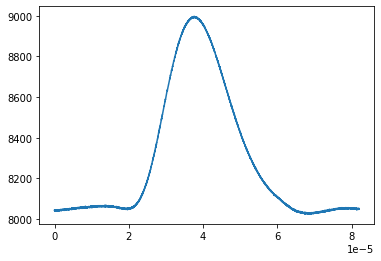

In [30]:
plt.plot(x,list_event[evento])

In [31]:
#integral of each event 
values_integrals=[integrate.trapz(event,x) for event in list]

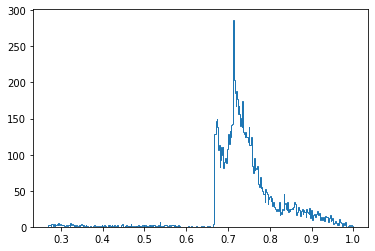

In [32]:
#histogram of the spectrum

numb_bins=400  #try to change this maybe

plt.hist(values_integrals,bins=numb_bins,histtype="step")
plt.show()
#plt.ylim(0,400)   #to cut the y axis 
#plt.xlim(0.65,0.9)

In [37]:
#codice per lo spettro in FREQUENZA
#utile per analisi del rumore

def spettro(f):
    N = len(f)                     # Lunghezza del vettore di partenza
    Nf = int( N / 2. )                # Frequenza di Nyquist
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return  sp

def w(f):
  N = len(f)                       
  Nf = int( N / 2. ) 
  om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
  return om    




In [ ]:

spectra=[spettro(list_event[event]) for event in range(len(list))]
omega_interval=w(list_event[evento])

In [ ]:
len(spectra[0])

4097

In [ ]:
N=int(samples_per_event/2)+1
mean_sp=np.zeros(N)

for j in range(N):
  for i in range(len(list)):
    mean_sp[j]+=spectra[i][j]

mean_sp=mean_sp/len(list)

In [ ]:
len(mean_sp)

4097

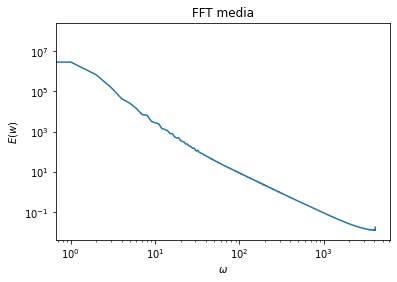

In [ ]:
plt.title("FFT media")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")

plt.plot(omega_interval,mean_sp,'-')

plt.xscale("log")
plt.yscale("log")

plt.xlim(1e3,)

plt.show()